In [1]:
import struct

file_path = "/Users/aleksandrbogdanov/MyJupyterNotebook/Datasets/28.DAT"

with open(file_path, "rb") as file:
    # Шаг 2: Пропускаем первые 8 значений
    file.seek(7*4)# 8 значений по 4 байта каждое
    
    
    # Шаг 3: Считываем оставшиеся значения
    buffer_size = (3792-7*4)//4 # Размер файла 4 килобайта, минус техническая информация, каждое значение по 4 байта
    print(buffer_size)
    data = file.read(buffer_size*4)  # Читаем все оставшиеся данные
    print(len(data))

    # Распаковываем данные с использованием struct.unpack
    format_string = f'{buffer_size}I'  # Формат: целые числа (4 байта) * количество значений
    unpacked_data = struct.unpack(format_string, data)

# Теперь у вас есть распакованные данные, представленные в виде кортежа или списка
print(unpacked_data)

941
3764
(70, 52, 50, 58, 50, 51, 59, 52, 54, 56, 52, 57, 57, 54, 48, 38, 36, 44, 42, 34, 38, 36, 40, 50, 49, 46, 45, 48, 48, 43, 36, 32, 35, 36, 34, 30, 35, 37, 37, 42, 38, 32, 32, 37, 42, 45, 38, 34, 33, 30, 31, 30, 32, 32, 26, 39, 39, 26, 31, 38, 34, 32, 30, 25, 26, 28, 36, 34, 25, 28, 31, 28, 25, 26, 26, 28, 26, 25, 28, 32, 32, 34, 34, 30, 30, 29, 28, 28, 26, 26, 24, 28, 35, 29, 26, 27, 31, 36, 33, 24, 22, 20, 23, 27, 24, 24, 26, 26, 22, 18, 22, 24, 23, 27, 27, 22, 24, 28, 26, 22, 24, 22, 23, 31, 29, 23, 22, 22, 24, 24, 16, 15, 22, 20, 23, 24, 23, 20, 18, 24, 21, 22, 24, 26, 30, 26, 23, 22, 19, 18, 18, 22, 19, 20, 23, 20, 24, 28, 24, 20, 25, 24, 22, 20, 18, 18, 20, 20, 16, 16, 22, 25, 24, 24, 26, 24, 21, 20, 18, 20, 25, 23, 18, 20, 19, 19, 20, 20, 24, 22, 16, 16, 18, 19, 20, 15, 14, 22, 22, 19, 19, 16, 22, 30, 27, 22, 22, 22, 20, 21, 22, 22, 20, 18, 14, 20, 24, 22, 18, 16, 18, 18, 19, 18, 17, 22, 20, 20, 22, 16, 14, 16, 18, 20, 18, 20, 20, 18, 18, 22, 27, 26, 22, 21, 22, 23, 22, 20

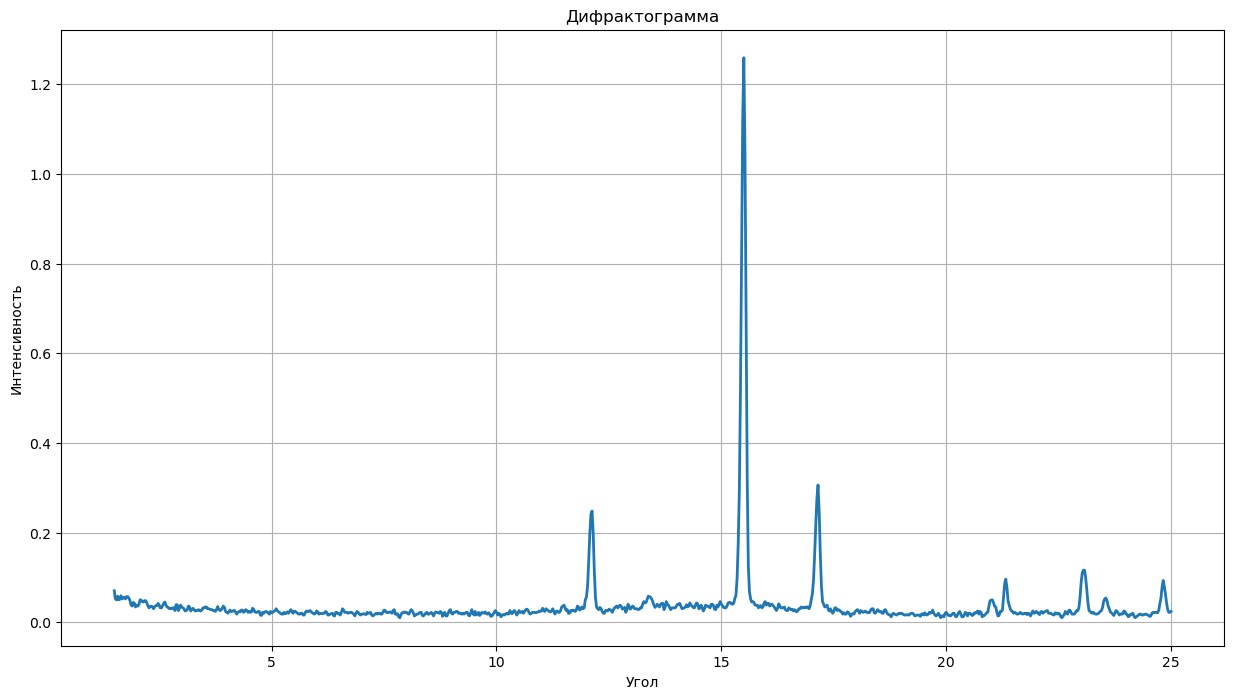

In [2]:
import matplotlib.pyplot as plt

spectrum = unpacked_data
angle = []
i = 0
first_val = 1.5
while i != len(spectrum):
    angle.append(first_val)
    first_val+=0.025
    
    i+=1
    
plt.figure(figsize=(15,8))

angle = np.asarray(angle)

spectrum = np.array([i/1000 for i in spectrum])
    
plt.plot(angle, spectrum, lw = 2)

plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.title('Дифрактограмма')

plt.grid()

In [308]:
spectrum.shape

(941,)

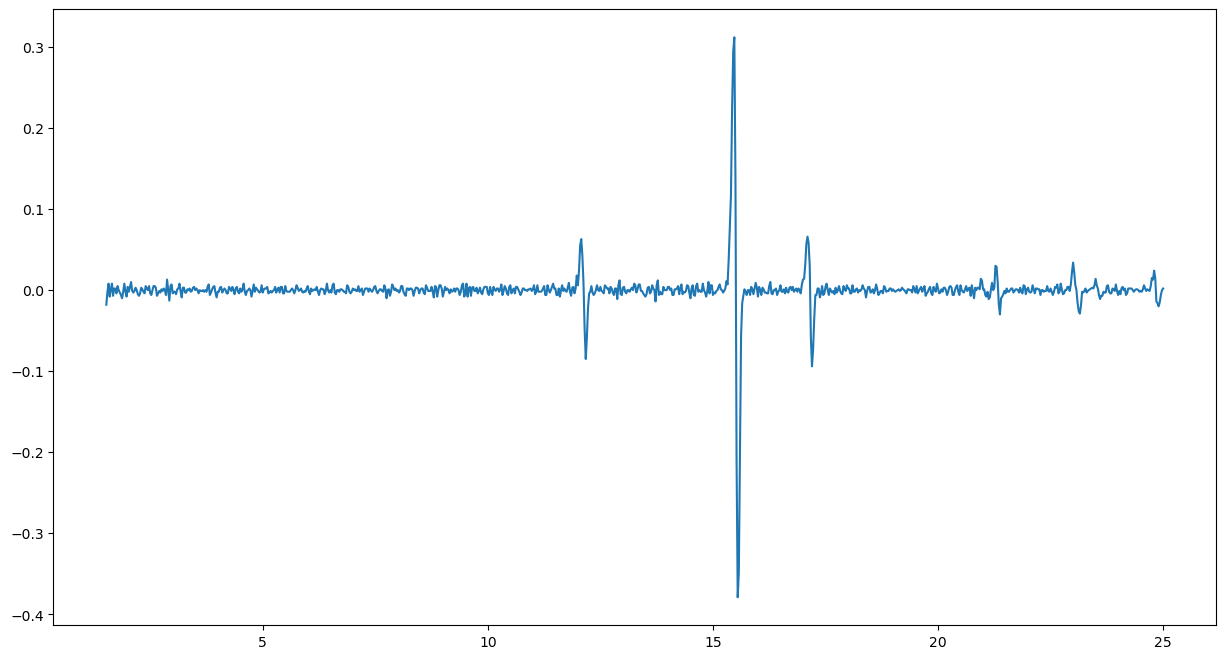

In [3]:

difference = np.diff(spectrum)
new_ang = angle[1:]

plt.figure(figsize=(15,8))
plt.plot(new_ang, difference)

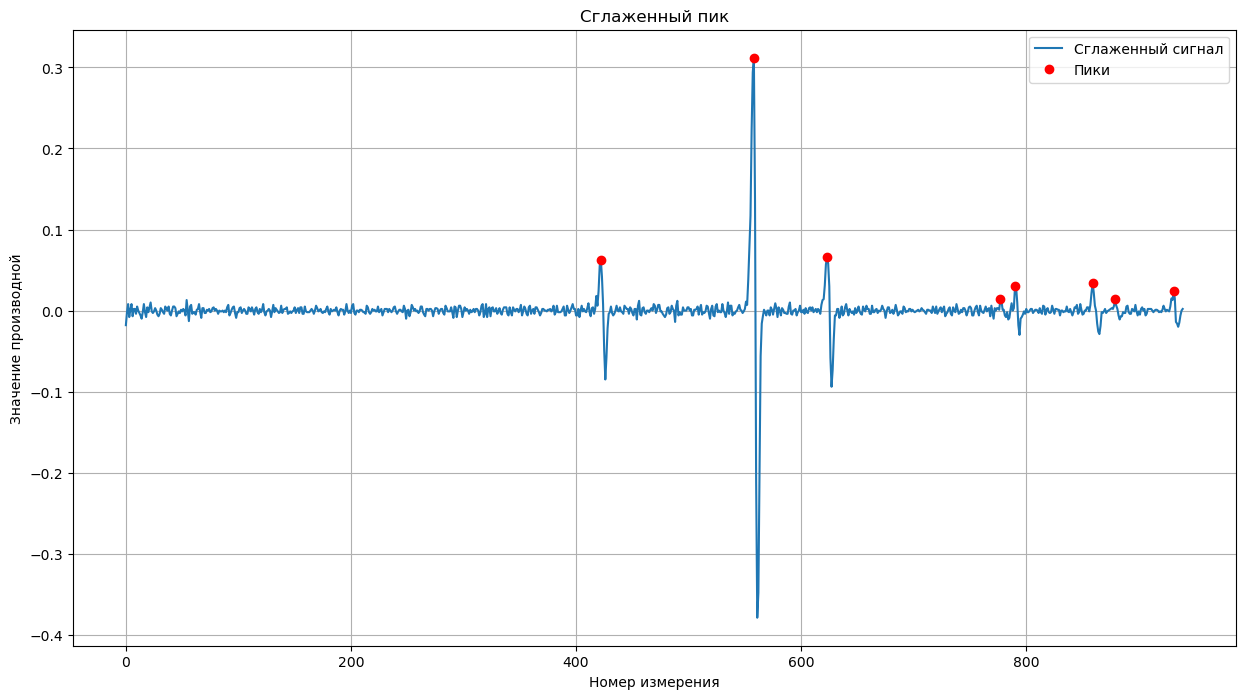

In [4]:
from scipy.signal import find_peaks

height_threshold = 0.013 # Высота (порог) пика
distance_threshold = 5  # Минимальное расстояние между пиками

# Нахождение локальных максимумов с настройкой параметров
peaks, _ = find_peaks(difference, height=height_threshold, distance=distance_threshold)

# Уберем первый нежелательный пик
peaks = peaks[1:]

# Визуализация результатов
plt.figure(figsize=(15,8))
plt.plot(difference, label='Сглаженный сигнал')
plt.plot(peaks, difference[peaks], 'ro', label='Пики')
plt.xlabel('Номер измерения')
plt.ylabel('Значение производной')
plt.title('Сглаженный пик')

plt.legend()
plt.grid()


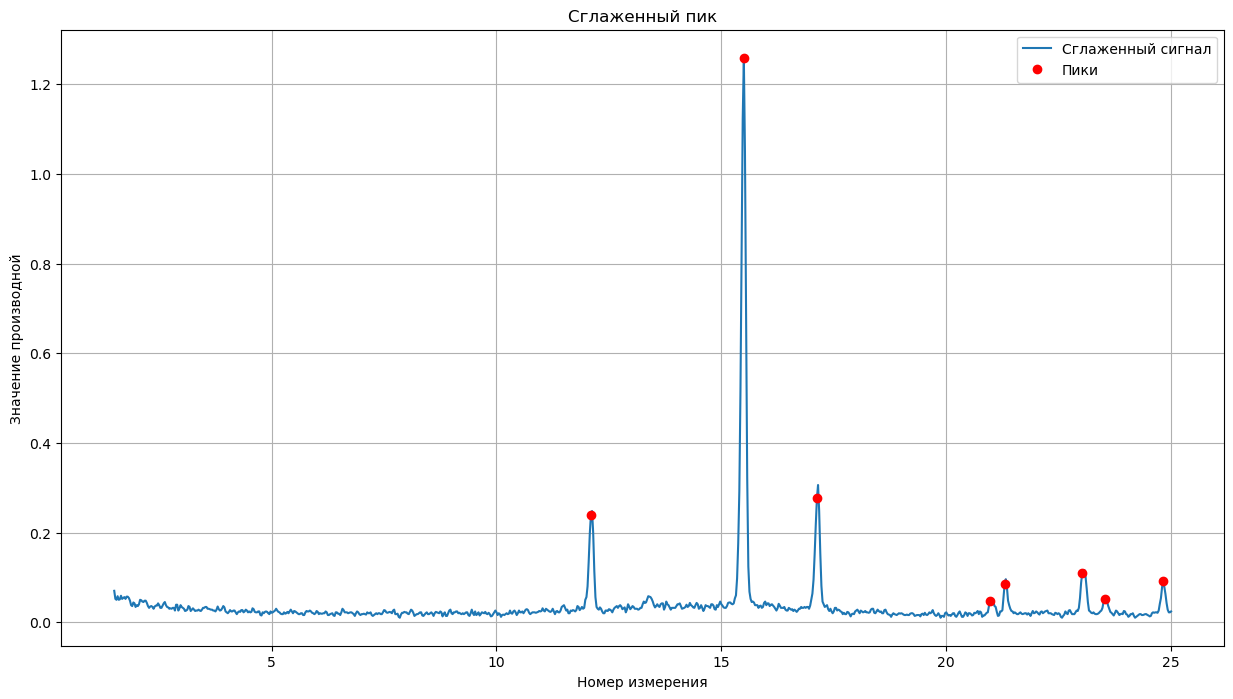

In [5]:
# Пики на спектре
peaks = [i+2 for i in peaks]

plt.figure(figsize=(15,8))
plt.plot(angle, spectrum, label='Сглаженный сигнал')
plt.plot(angle[peaks], spectrum[peaks], 'ro', label='Пики')
plt.xlabel('Номер измерения')
plt.ylabel('Значение производной')
plt.title('Сглаженный пик')

plt.legend()
plt.grid()

Теперь используем скользящий отрезок

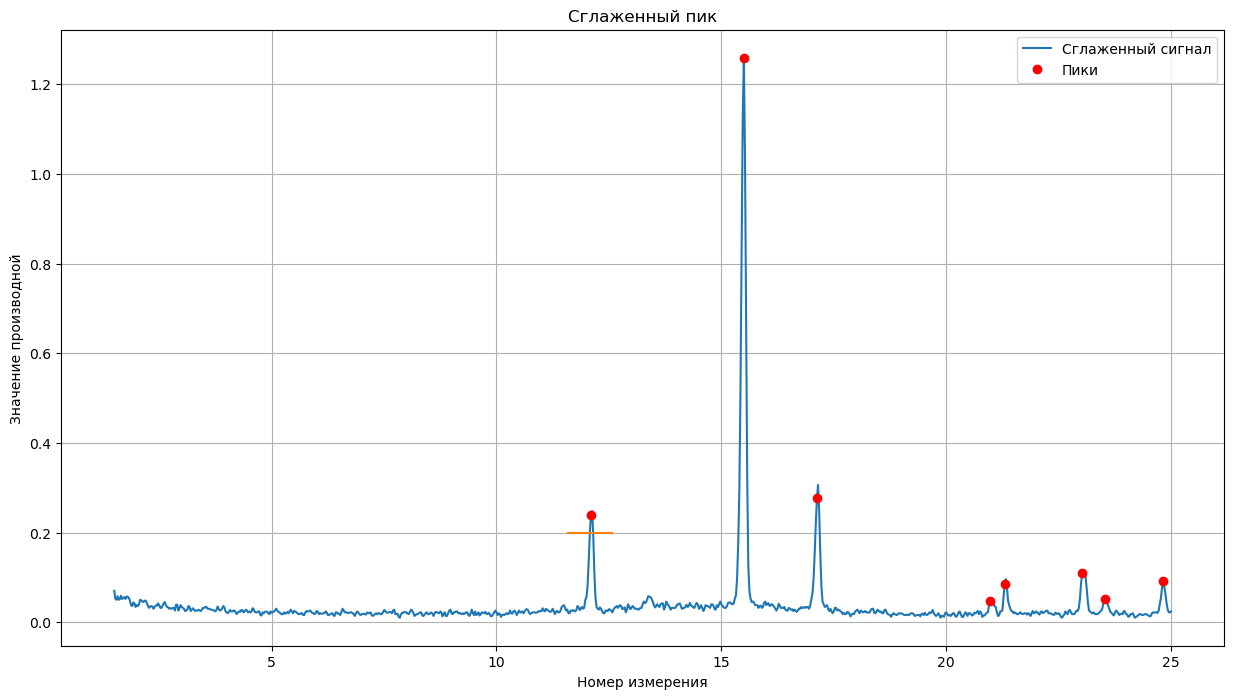

In [6]:
# Посмотрим какой длины отрезок нужно взять - возьмем 40 значений примерно 1 градус

plt.figure(figsize=(15,8))

first_val = peaks[0] - 20
final_val = peaks[0] + 20
zone = [i for i in range(first_val, final_val)]
angle_zone = angle[zone]
one_val = [0.2 for i in range(len(angle_zone))]

plt.plot(angle, spectrum, label='Сглаженный сигнал')
plt.plot(angle[peaks], spectrum[peaks], 'ro', label='Пики')
plt.plot(angle_zone, one_val)
plt.xlabel('Номер измерения')
plt.ylabel('Значение производной')
plt.title('Сглаженный пик')

plt.legend()
plt.grid()

In [7]:
# Ищем фоновые значения скользящим отрезком

e = 0.001
fon = np.zeros((spectrum.shape[0]))


for val in range(spectrum.shape[0]):
    
    if val + len(zone) + 1 > len(spectrum):
        break
        
    first = spectrum[val]
    last = spectrum[val+len(zone)]
    
    if last > first:
        step = (last-first)/len(zone)
        otrezok = np.arange(first, last, step)
        
        
    elif first > last:
        step = (first-last)/len(zone)
        otrezok = np.arange(last, first, step)
    
    elif first - last < 1e-5:
        otrezok = [first for i in range(len(zone))]
    
    part_spectrum = spectrum[val:val+len(zone)]
    
    for srav in range(len(zone)):
        
        if part_spectrum[srav] > otrezok[srav]:
            fon[val+srav] = otrezok[srav]
        
        elif part_spectrum[srav] < otrezok[srav]:
            fon[val+srav] = part_spectrum[srav]

fon
        
    

array([0.038   , 0.032   , 0.032   , 0.037   , 0.042   , 0.045   ,
       0.038   , 0.034   , 0.033   , 0.03    , 0.031   , 0.03    ,
       0.032   , 0.032   , 0.026   , 0.02655 , 0.036   , 0.026   ,
       0.031   , 0.031275, 0.034   , 0.032   , 0.03    , 0.025   ,
       0.026   , 0.028   , 0.036   , 0.034   , 0.025   , 0.028   ,
       0.031   , 0.028   , 0.025   , 0.026   , 0.026   , 0.028   ,
       0.026   , 0.025   , 0.028   , 0.032   , 0.032   , 0.032   ,
       0.032   , 0.03    , 0.03    , 0.029   , 0.028   , 0.028   ,
       0.026   , 0.026   , 0.024   , 0.028   , 0.02805 , 0.029   ,
       0.026   , 0.027   , 0.031   , 0.026   , 0.02625 , 0.024   ,
       0.022   , 0.02    , 0.023   , 0.023175, 0.024   , 0.024   ,
       0.026   , 0.026   , 0.022   , 0.018   , 0.022   , 0.024   ,
       0.023   , 0.02305 , 0.026   , 0.022   , 0.024   , 0.02405 ,
       0.026   , 0.022   , 0.024   , 0.022   , 0.023   , 0.023275,
       0.029   , 0.023   , 0.022   , 0.022   , 0.024   , 0.024

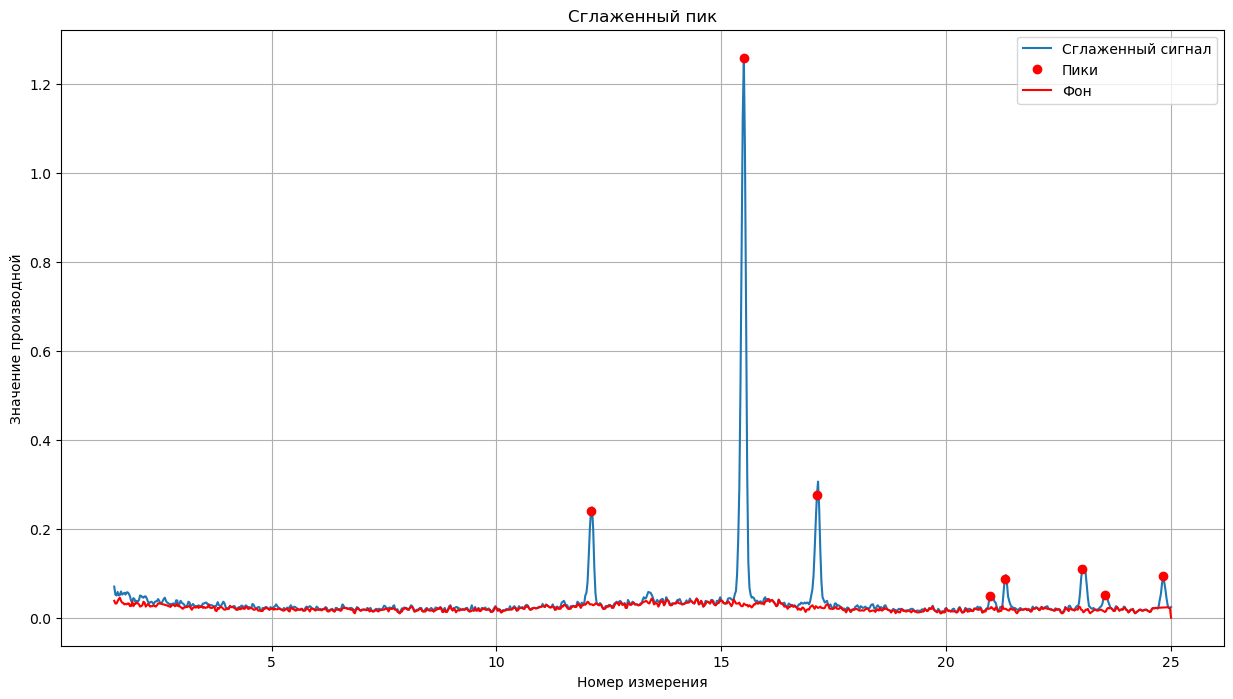

In [10]:
# Визуализируем фон

plt.figure(figsize=(15,8))

plt.plot(angle, spectrum, label='Сглаженный сигнал')
plt.plot(angle[peaks], spectrum[peaks], 'ro', label='Пики')
plt.plot(angle, fon, color = 'r', label = 'Фон')
plt.xlabel('Номер измерения')
plt.ylabel('Значение производной')
plt.title('Сглаженный пик')

plt.legend()
plt.grid()

In [11]:
# Вычленяем из фона пики
piki = []
for val in range(spectrum.shape[0]):
    if spectrum[val] - fon[val] >= 0.015:
        piki.append(val)
piki = np.asarray(piki)
piki = piki[21:] 
piki

array([419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 474, 475, 476,
       477, 549, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562,
       563, 564, 565, 566, 567, 568, 611, 614, 615, 616, 617, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 778, 779, 780,
       781, 782, 783, 791, 792, 793, 794, 795, 796, 859, 860, 861, 862,
       863, 864, 865, 866, 879, 880, 881, 882, 883, 884, 930, 931, 932,
       933, 934, 935, 936, 940])

In [25]:
# Разделим массив пиков для визуализации
draw_picks = []
pick = []
for i in range(piki.shape[0] - 1):
    if piki[i] + 5 > piki[i+1]:
        pick.append(piki[i])
    else:
        pick.append(piki[i])
        draw_picks.append(pick)
        pick = []

draw_picks.append([930, 931, 932,
       933, 934, 935, 936, 940])
draw_picks

[[419, 420, 421, 422, 423, 424, 425, 426, 427, 428],
 [474, 475, 476, 477],
 [549,
  552,
  553,
  554,
  555,
  556,
  557,
  558,
  559,
  560,
  561,
  562,
  563,
  564,
  565,
  566,
  567,
  568],
 [611,
  614,
  615,
  616,
  617,
  620,
  621,
  622,
  623,
  624,
  625,
  626,
  627,
  628,
  629,
  630,
  631],
 [778, 779, 780, 781, 782, 783],
 [791, 792, 793, 794, 795, 796],
 [859, 860, 861, 862, 863, 864, 865, 866],
 [879, 880, 881, 882, 883, 884],
 [930, 931, 932, 933, 934, 935, 936, 940]]

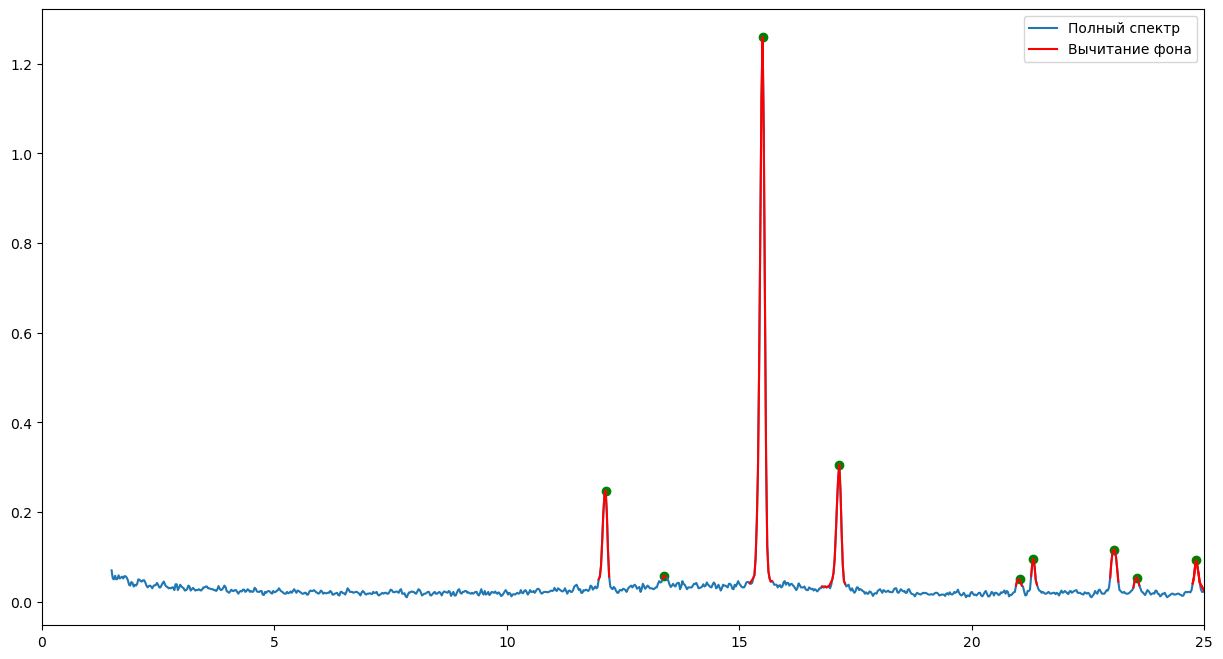

In [32]:
# Визуализируем результат - пики без фона

plt.figure(figsize=(15,8))
plt.plot(angle, spectrum, label='Полный спектр')

for i in range(len(draw_picks)):
    plt.plot(angle[draw_picks[i]], spectrum[draw_picks[i]], c = 'r')

for i in range(len(draw_picks)):
    current_peak = spectrum[draw_picks[i]]
    max_val = np.argmax(current_peak)
    max_peak = draw_picks[i][max_val]
    plt.scatter(angle[max_peak], spectrum[max_peak], c = 'g')
    
 
plt.plot(angle[piki[-8:]], spectrum[piki[-8:]], c = 'r', label = 'Вычитание фона')

plt.xlim([0, 25])

plt.legend()
plt.show()

Метод эталонного пика - корреляции

In [204]:
# Вот наши пики (индексы)
peaks

[424, 560, 625, 779, 792, 861, 881, 933]

In [47]:
# В качестве эталона возьмем 2ой пик - самый высокий

first_peak = peaks[1] - 10
final_peak = peaks[1] + 10
zone_etal = [i for i in range(first_peak, final_peak)]
etalon_peak_angles = angle[zone_etal]
etalon_peak_spectrum = spectrum[zone_etal]
final_peak-first_peak

20

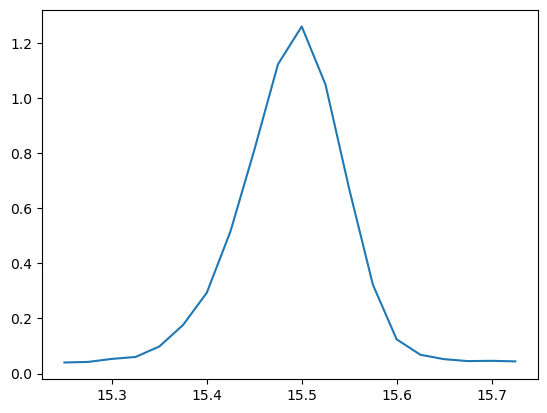

In [34]:
# Визуализируем эталонный пик

plt.plot(etalon_peak_angles, etalon_peak_spectrum)

In [50]:
# Найдем корреляцию 

correl = []
first_value,second_value = 0,20
while second_value <= len(spectrum):
    cor = np.corrcoef(spectrum[first_value:second_value], spectrum[first_peak:final_peak])[0,1]
    correl.append(cor)
    first_value += 1
    second_value += 1
correl

[0.3422379701943488,
 0.5254360447912264,
 0.4707222319598475,
 0.3012007074302018,
 0.06510038553901629,
 -0.2171341832599595,
 -0.4139348880952378,
 -0.5270334897896138,
 -0.6412103669806557,
 -0.7240186495597716,
 -0.7021802795471249,
 -0.5016068978756189,
 -0.17023275958942066,
 0.1909429044896085,
 0.5215223491509511,
 0.7236410717545079,
 0.7480424834778947,
 0.6949843201048784,
 0.5793156572015803,
 0.3369550378973846,
 -0.024687915166510446,
 -0.2941254611529518,
 -0.4450980460212423,
 -0.500783083956527,
 -0.5349047681276944,
 -0.5400183887550452,
 -0.4601492033252607,
 -0.2915598846441044,
 -0.0801197819498698,
 0.09807496360572066,
 0.15889383657571762,
 0.1291189757190688,
 0.19192763957261083,
 0.3816402790174366,
 0.5815197768235105,
 0.620874447846755,
 0.4066568561779503,
 0.11809364134321666,
 -0.060391356007754,
 -0.22485992513629757,
 -0.3455866929281221,
 -0.4028448573679359,
 -0.4230302352317038,
 -0.35454248444888226,
 -0.16613390660316435,
 0.036392534924014466,


In [107]:
# находим пики по корреляции
corr_copy = correl.copy()
peak_values = []
near_big = []
for i in range(1,9):
    value_n_index = []
    
    # Взяли наибольшее значение корреляции
    peak_value = max(corr_copy)
    
    value_index = correl.index(peak_value)
    value_n_index.append(peak_value)
    
    nearby_big_values = list(range(value_index-7, value_index+7))
    near_big.append(nearby_big_values)
    value_n_index.append(value_index)
    
    peak_values.append(value_n_index)
    
    # Удаляем значения наибольшей корреляции
    for k in nearby_big_values:
        if correl[k] in corr_copy:
            corr_copy.remove(correl[k])
            
near_big

[[543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556],
 [609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622],
 [408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421],
 [865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878],
 [846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859],
 [776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789],
 [764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777],
 [459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472]]

In [104]:
# Добавим + 10 индексов - вычлись за счет корреляции

peak_values.append([correl[-1], len(correl)])
for i in range(len(peak_values)):
    peak_values[i][1] += 10
    



In [105]:
# Тут хранятся значения для пиков 
new_big = []
for i in range(len(near_big)):
    part = near_big[i]
    for i in range(len(part)):
        part[i] += 10
    new_big.append(part)
    
new_big.append([i for i in range(928, 938)])
new_big

[[553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566],
 [619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632],
 [418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431],
 [875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888],
 [856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869],
 [786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799],
 [774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787],
 [469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482],
 [928, 929, 930, 931, 932, 933, 934, 935, 936, 937]]

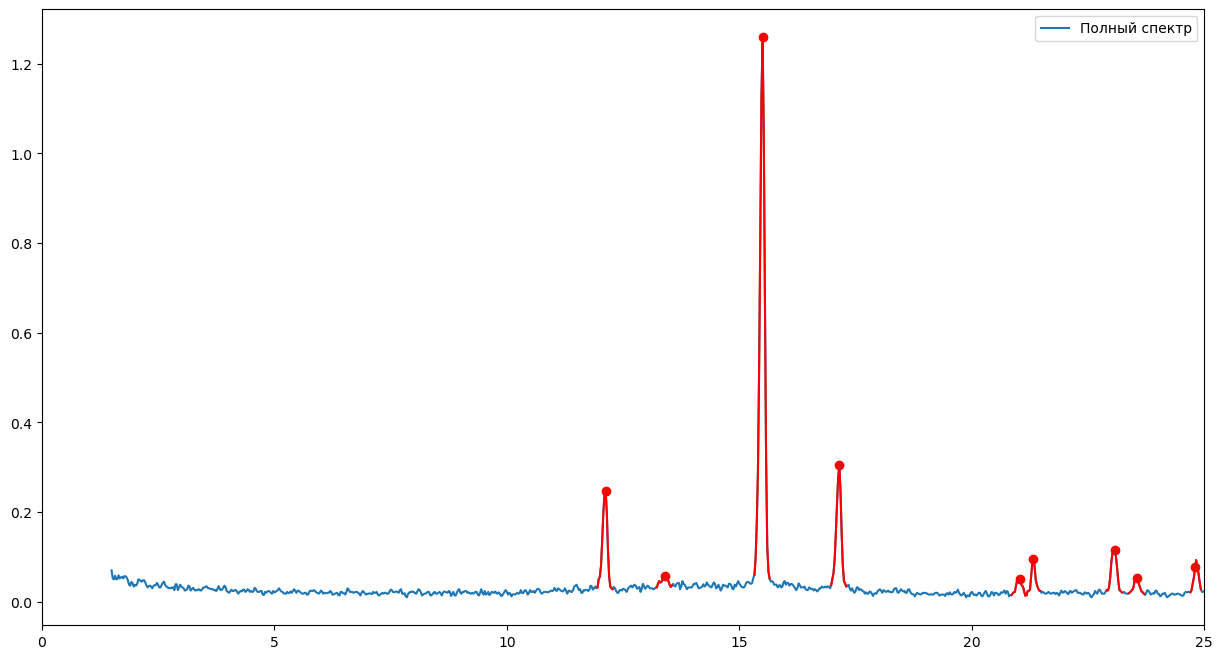

In [106]:
# Визуализируем результат

plt.figure(figsize=(15,8))
plt.plot(angle, spectrum, label='Полный спектр')


for i in range(len(new_big)):
    plt.plot(angle[new_big[i]], spectrum[new_big[i]], c = 'r')
    plt.scatter(angle[peak_values[i][1]], spectrum[peak_values[i][1]], c = 'g')
    
plt.xlim([0, 25])

plt.legend()
plt.show()